In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"
plt.rc('font', size=18)

### 2a

Defining my scale-height and using the code from the repo to define my array of heights: z_rand

In [2]:
H = 1.0
zmax = 7.0

x_rand = random(100000)
y_rand = random(100000)

z_rand = np.zeros(100000)

for i in range(len(z_rand)):
    h = 0
    while(h == 0):
        h_loop = random()*zmax
        probability = np.exp(-h_loop/H)
        if random() <= probability:
            h = h_loop
    z_rand[i] = h

Plotting histogram to check that they do follow an exponential, which they do.

(-0.2, 5.0)

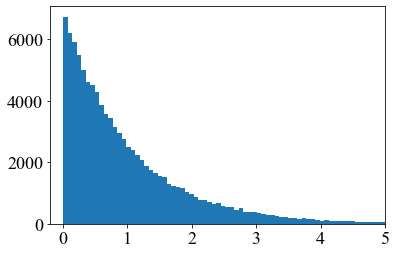

In [9]:
T = plt.hist(z_rand, bins=100)
plt.xlim(-0.2,5)

### 2b

In [12]:
b = 0.008
sigma = np.pi*b**2

x_ph = random(20000)
y_ph = random(20000)

z_ph = np.zeros(20000)

from tqdm import tqdm

#got this from the solutions because my way was super convoluted and involved nested loops
for j in tqdm(range(20000)):       
    r_cyl = np.sqrt((x_rand-x_ph[j])**2 + (y_rand-y_ph[j])**2)
    
    cylinder = np.where(r_cyl < b)[0]
    
    if len(cylinder) == 0:  # no collisions
        z_ph[j] = 0
    else:
        z_ph[j] = np.max(z_rand[cylinder])

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1053.12it/s]


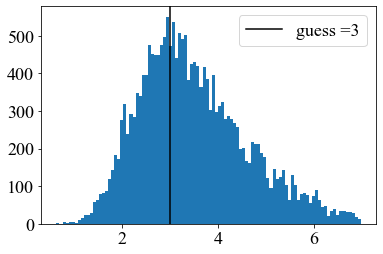

In [15]:
T = plt.hist(z_ph, bins=100)
guess = 3
plt.axvline(guess, c='k', label='guess ='+str(guess))

plt.legend()

### 2c


#### We know the formula of optical depth to be 

#### $\tau(z) = n(z) \sigma H e^{-z/H}$

#### If we want the total optical depth, we can write it for the surface ($z=0$):

#### $\tau = n(z) \sigma H$


I was expecting the optical depth $\tau$ to be closer to 1, but I suppose 0.6 is close enough to unity.

In [16]:
ichoose = np.where(z_rand < H)[0]

volume = 1*1*H

n_surf = len(ichoose)/volume

n = n_surf*np.exp(-3./H)

tau = n*sigma*H
print(tau)

0.6339813195238413


In [17]:
z_LowAbsorption = 6

tau_LowAbsorption = n_surf*np.exp(-z_LowAbsorption/H)*sigma*H
print(tau_LowAbsorption)

0.03156407129908208
